In [1]:
import os
import json
import requests
import time 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime

from functions import load_api_key, plotting

pd.set_option('display.max_columns', None)

%load_ext autoreload
%autoreload 2

# Foreign Workers (FW) or Foreign Talents (FT)

In [2]:
FT_df = pd.read_excel('inputs/foreign-workforce-numbers.xlsx')
FT_df.columns = FT_df.iloc[0]  
FT_df = FT_df.T
FT_df.columns = FT_df.iloc[0]  
FT_df = FT_df.iloc[1:]
FT_df = FT_df.reset_index(drop=True)  

In [3]:
FT_df.columns

Index(['Pass Type', 'Employment Pass (EP)', 'S Pass', 'Work Permit (Total)',
       '- Work Permit (Migrant Domestic Workers)',
       '- Work Permit (Construction, Marine Shipyard and Process)',
       'Other Work Passes2', 'Total Foreign Workforce',
       'Total Foreign Workforce \n(excluding Migrant Domestic Workers) ',
       'Total Foreign Workforce \n(excluding Migrant Domestic Workers & Work Permits in Construction, Marine Shipyard and Process) ',
       'Notes:', '1. Data may not add up to the total due to rounding.',
       '2. "Other Work Passes" includes Letter of Consent (LOC), pre-approved LOC, Training Work Permit (TWP) and Training Employment Pass (TEP).',
       '3. Data are revised at the industry level to reflect updates in industry classification of firms based on the Singapore Standard Industrial Classification (SSIC) 2020. '],
      dtype='object', name='Pass Type')

In [4]:
FT_df

Pass Type,Pass Type,Employment Pass (EP),S Pass,Work Permit (Total),- Work Permit (Migrant Domestic Workers),"- Work Permit (Construction, Marine Shipyard and Process)",Other Work Passes2,Total Foreign Workforce,Total Foreign Workforce \n(excluding Migrant Domestic Workers),"Total Foreign Workforce \n(excluding Migrant Domestic Workers & Work Permits in Construction, Marine Shipyard and Process)",Notes:,1. Data may not add up to the total due to rounding.,"2. ""Other Work Passes"" includes Letter of Consent (LOC), pre-approved LOC, Training Work Permit (TWP) and Training Employment Pass (TEP).",3. Data are revised at the industry level to reflect updates in industry classification of firms based on the Singapore Standard Industrial Classification (SSIC) 2020.
0,Dec 2018,185800,195500,972600,253800,355700,32100,1386000,1132200,776400,NaN,NaN,NaN,NaN
1,Dec 2019,193700,200000,999000,261800,370100,34700,1427400,1165600,795500,NaN,NaN,NaN,NaN
2,Dec 2020,177100,174000,848200,247400,311100,32200,1231500,984100,673000,NaN,NaN,NaN,NaN
3,Dec 2021,161700,161800,849700,246300,318500,27200,1200400,954100,635700,NaN,NaN,NaN,NaN
4,Dec 2022,187300,177900,1033500,268500,415000,25400,1424200,1155700,740700,NaN,NaN,NaN,NaN
5,Dec 2023,205400,178500,1113000,286300,441100,28500,1525500,1239200,798000,NaN,NaN,NaN,NaN


In [5]:
FT_df = FT_df[['Pass Type', 'Employment Pass (EP)', 'S Pass', 'Work Permit (Total)', '- Work Permit (Migrant Domestic Workers)',
       '- Work Permit (Construction, Marine Shipyard and Process)',
       'Other Work Passes2', 'Total Foreign Workforce']]
FT_df = FT_df.rename(columns= {'- Work Permit (Construction, Marine Shipyard and Process)' : 'Work Permit (Construction, Marine Shipyard and Process)', 
                               'Other Work Passes2':'Other Work Passes', 
                              '- Work Permit (Migrant Domestic Workers)' : 'Work Permit (Migrant Domestic Workers)'})

In [6]:
for col in FT_df.columns:
    if col == 'Pass Type':
        continue
    else:
        FT_df[col] = FT_df[col].astype(int)

In [7]:
FT_df['datetime'] = pd.to_datetime(FT_df['Pass Type'], errors = 'coerce')
FT_df['year'] = FT_df['datetime'].dt.year

C:\Users\EGGCAKE\AppData\Local\Temp\ipykernel_23656\2866258987.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  FT_df['datetime'] = pd.to_datetime(FT_df['Pass Type'], errors = 'coerce')


In [8]:
FT_df.dtypes

Pass Type
Pass Type                                                          object
Employment Pass (EP)                                                int32
S Pass                                                              int32
Work Permit (Total)                                                 int32
Work Permit (Migrant Domestic Workers)                              int32
Work Permit (Construction, Marine Shipyard and Process)             int32
Other Work Passes                                                   int32
Total Foreign Workforce                                             int32
datetime                                                   datetime64[ns]
year                                                                int32
dtype: object

In [9]:
FT_df

Pass Type,Pass Type,Employment Pass (EP),S Pass,Work Permit (Total),Work Permit (Migrant Domestic Workers),"Work Permit (Construction, Marine Shipyard and Process)",Other Work Passes,Total Foreign Workforce,datetime,year
0,Dec 2018,185800,195500,972600,253800,355700,32100,1386000,2018-12-01,2018
1,Dec 2019,193700,200000,999000,261800,370100,34700,1427400,2019-12-01,2019
2,Dec 2020,177100,174000,848200,247400,311100,32200,1231500,2020-12-01,2020
3,Dec 2021,161700,161800,849700,246300,318500,27200,1200400,2021-12-01,2021
4,Dec 2022,187300,177900,1033500,268500,415000,25400,1424200,2022-12-01,2022
5,Dec 2023,205400,178500,1113000,286300,441100,28500,1525500,2023-12-01,2023


In [10]:
FT_df['Total Work Permit (excluding Migrant Domestic Workers)'] = FT_df['Work Permit (Total)'] - FT_df['Work Permit (Migrant Domestic Workers)']

In [11]:
FT_df

Pass Type,Pass Type,Employment Pass (EP),S Pass,Work Permit (Total),Work Permit (Migrant Domestic Workers),"Work Permit (Construction, Marine Shipyard and Process)",Other Work Passes,Total Foreign Workforce,datetime,year,Total Work Permit (excluding Migrant Domestic Workers)
0,Dec 2018,185800,195500,972600,253800,355700,32100,1386000,2018-12-01,2018,718800
1,Dec 2019,193700,200000,999000,261800,370100,34700,1427400,2019-12-01,2019,737200
2,Dec 2020,177100,174000,848200,247400,311100,32200,1231500,2020-12-01,2020,600800
3,Dec 2021,161700,161800,849700,246300,318500,27200,1200400,2021-12-01,2021,603400
4,Dec 2022,187300,177900,1033500,268500,415000,25400,1424200,2022-12-01,2022,765000
5,Dec 2023,205400,178500,1113000,286300,441100,28500,1525500,2023-12-01,2023,826700


In [12]:
collapsed_FT_df = pd.melt(FT_df, id_vars=["year"], var_name="category", value_name="number_of_people")

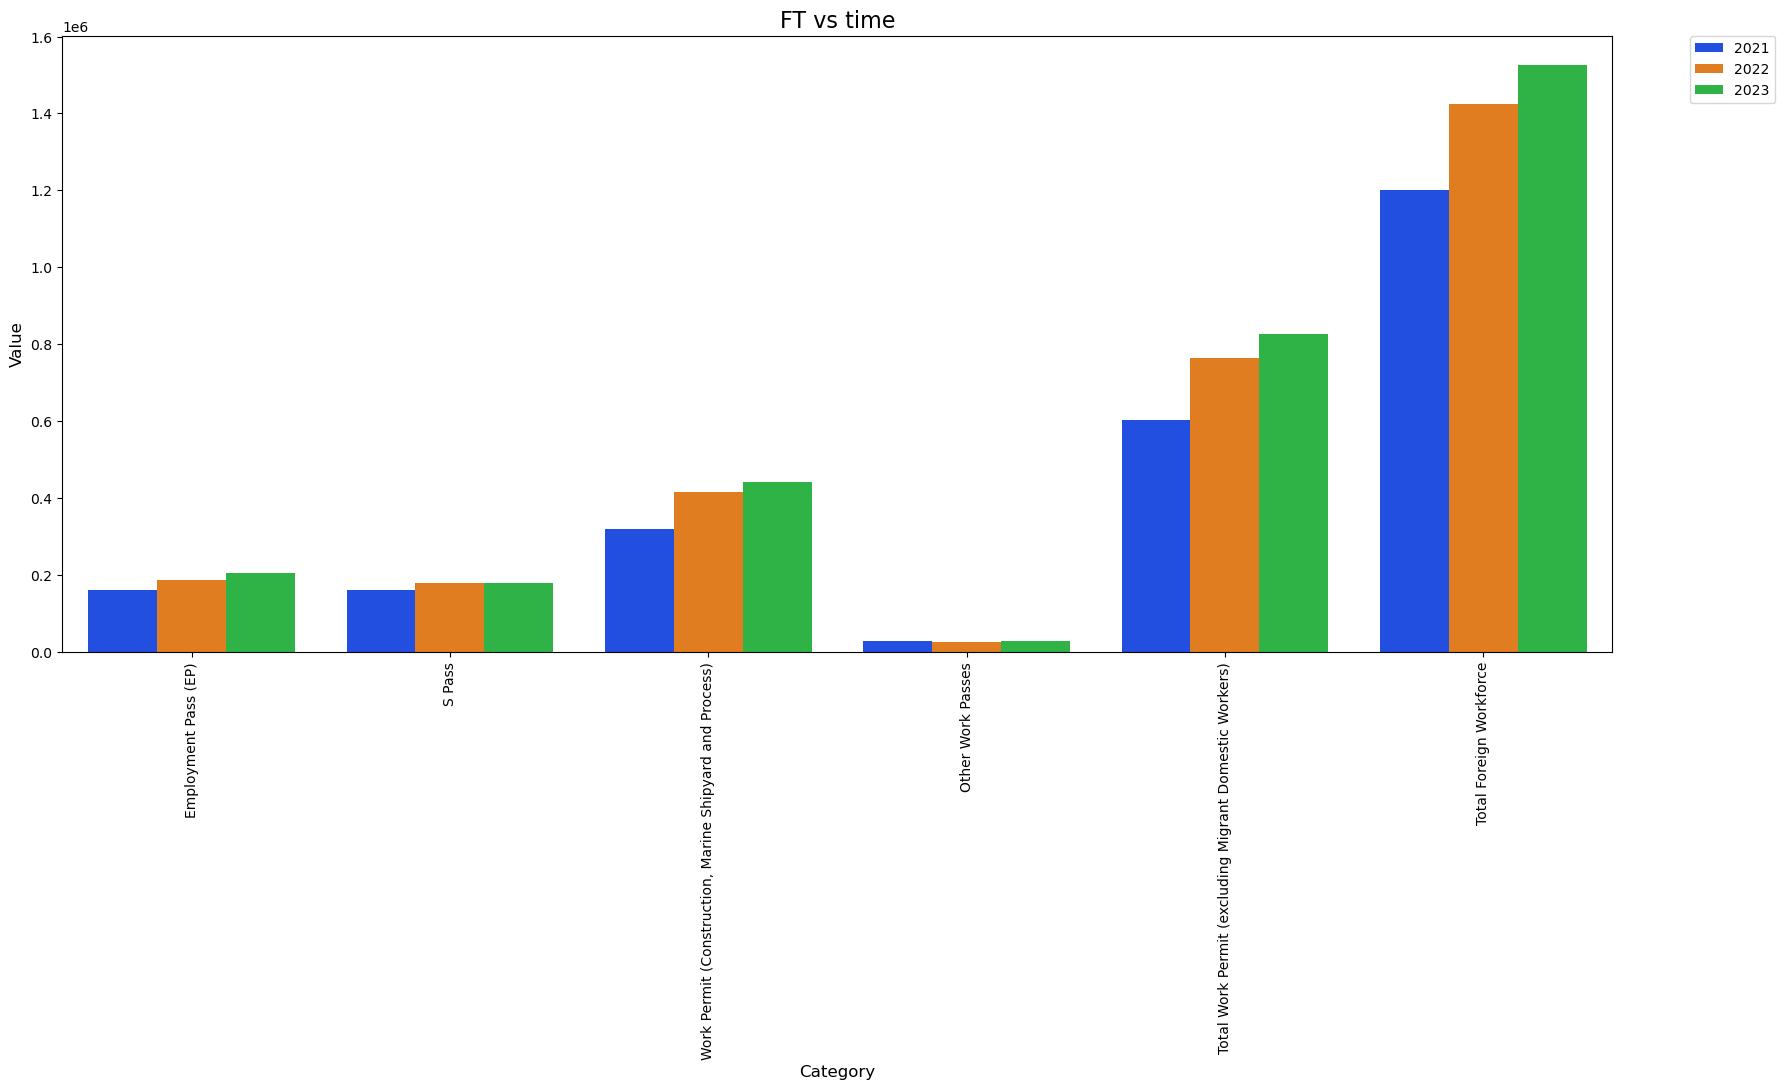

In [13]:
order = ['Employment Pass (EP)', 'S Pass', 'Work Permit (Construction, Marine Shipyard and Process)', 'Other Work Passes', 'Total Work Permit (excluding Migrant Domestic Workers)', 'Total Foreign Workforce']
df = collapsed_FT_df.loc[(collapsed_FT_df['category'].isin(order)) & (collapsed_FT_df['year'] >= 2021)].reset_index(drop = True)
df['number_of_people'] = df['number_of_people'].astype(int)
plotting('FT vs time', 'barplot', df, 'category', 'number_of_people', 'year', desired_order = order)

# Latest population figures

In [14]:
population_df = pd.read_csv('inputs/Indicators On Population.csv')
population_df.columns = population_df.iloc[7]
population_df = population_df.iloc[8:15]
population_df =population_df.T
population_df.columns = population_df.iloc[0]
population_df = population_df.iloc[1:6]
population_df = population_df .reset_index()
population_df = population_df.rename(columns = {7: 'year'})

In [15]:
population_df

Data Series,year,Total Population (Number),Resident Population (Number),Singapore Citizen Population (Number),Permanent Resident Population (Number),Non-Resident Population (Number),Total Population Growth (Per Cent),Resident Population Growth (Per Cent)
0,2024,6036860,4180868,3635937,544931,1855992,2,0.8
1,2023.0,5917648.0,4149253.0,3610658.0,538595.0,1768395.0,5.0,1.9
2,2022.0,5637022.0,4073239.0,3553749.0,519490.0,1563783.0,3.4,2.2
3,2021.0,5453566.0,3986842.0,3498191.0,488651.0,1466724.0,-4.1,-1.4
4,2020.0,5685807.0,4044210.0,3523191.0,521019.0,1641597.0,-0.3,0.4


In [16]:
collapsed_population_df = pd.melt(population_df, id_vars=["year"], var_name="category", value_name="number_of_people")
collapsed_population_df['year'] = collapsed_population_df['year'].astype(int)
collapsed_population_df['number_of_people'] = collapsed_population_df['number_of_people'].astype(float)

In [18]:
non_resident_population_df = population_df[['year', 'Non-Resident Population (Number)']].copy()
non_resident_population_df['year'] = non_resident_population_df['year'].astype(int)
non_resident_population_df['Non-Resident Population (Number)'] = non_resident_population_df['Non-Resident Population (Number)'].astype(int)
non_resident_population_df = non_resident_population_df.sort_values(by = 'year')
non_resident_population_df['number_of_people'] = non_resident_population_df['Non-Resident Population (Number)'].pct_change() * 100
non_resident_population_df['category'] = 'Non-Resident Growth (Per Cent)'
collapsed_population_df = pd.concat([collapsed_population_df, non_resident_population_df[['year', 'number_of_people', 'category']]])

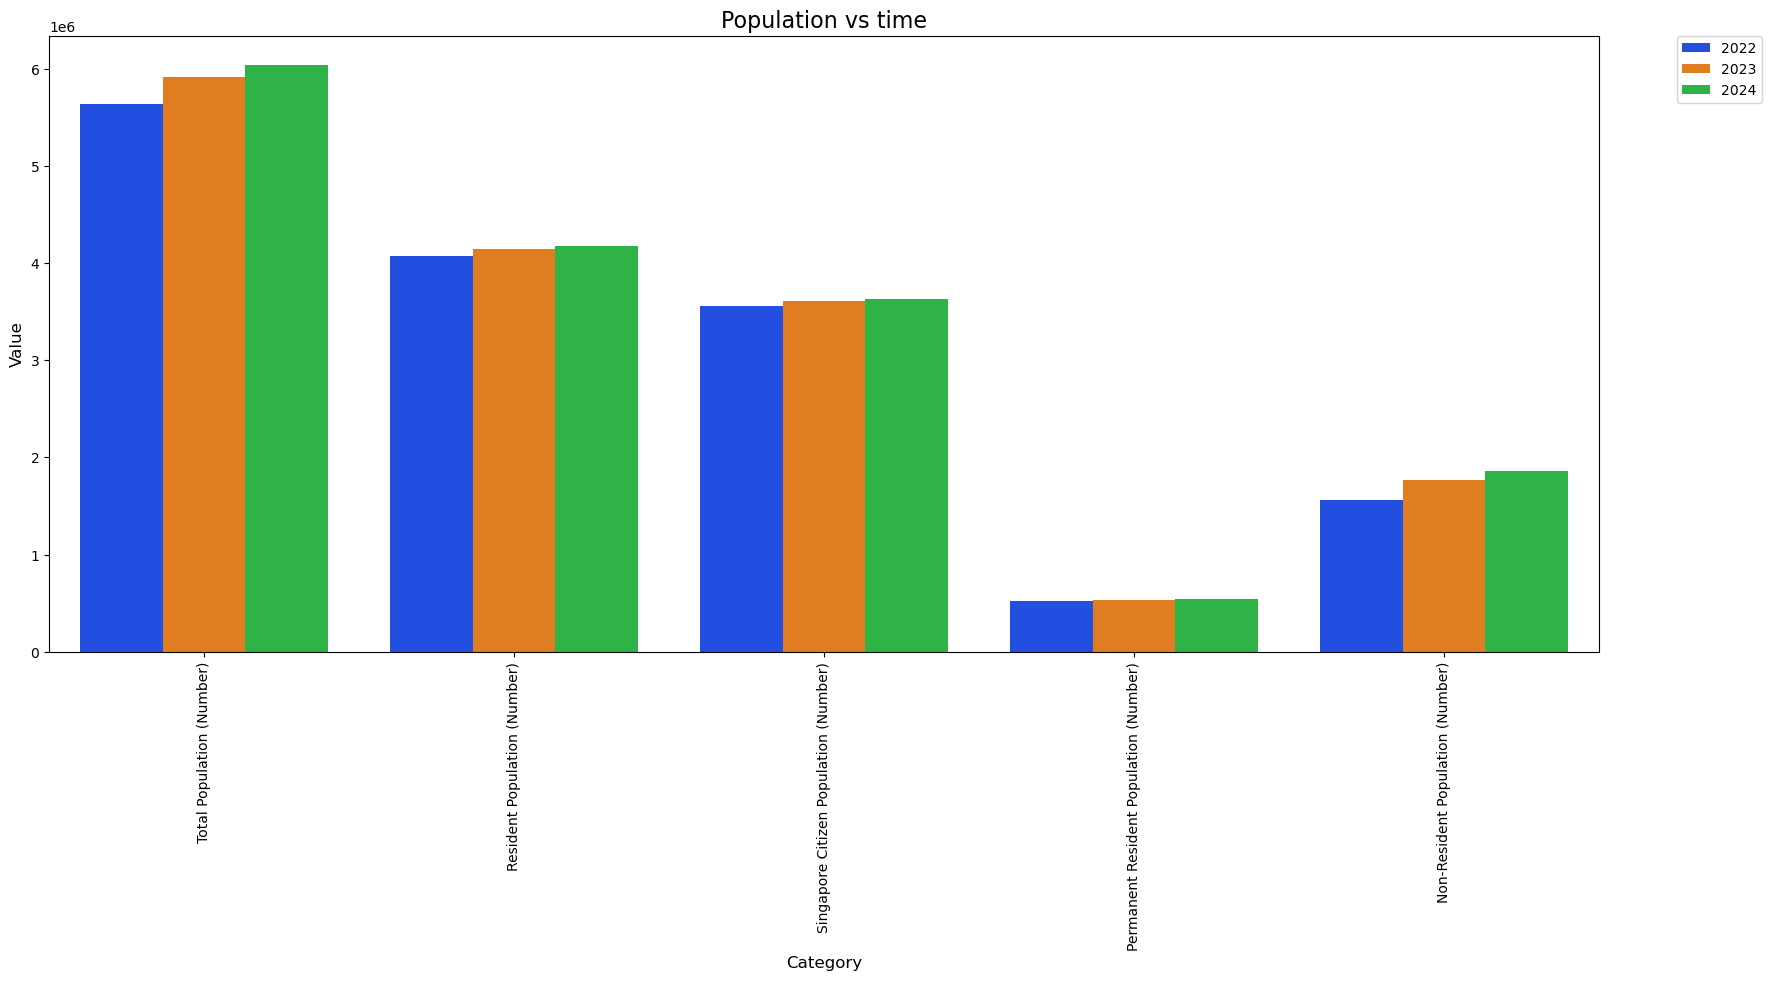

In [21]:
order = ['Total Population (Number)', 'Resident Population (Number)',
       'Singapore Citizen Population (Number)',
       'Permanent Resident Population (Number)',
       'Non-Resident Population (Number)']
df = collapsed_population_df.loc[(collapsed_population_df['category'].isin(order)) & (collapsed_population_df['year'] >= 2022)].reset_index(drop = True)
plotting('Population vs time', 'barplot', df, 'category', 'number_of_people', 'year', desired_order = order)

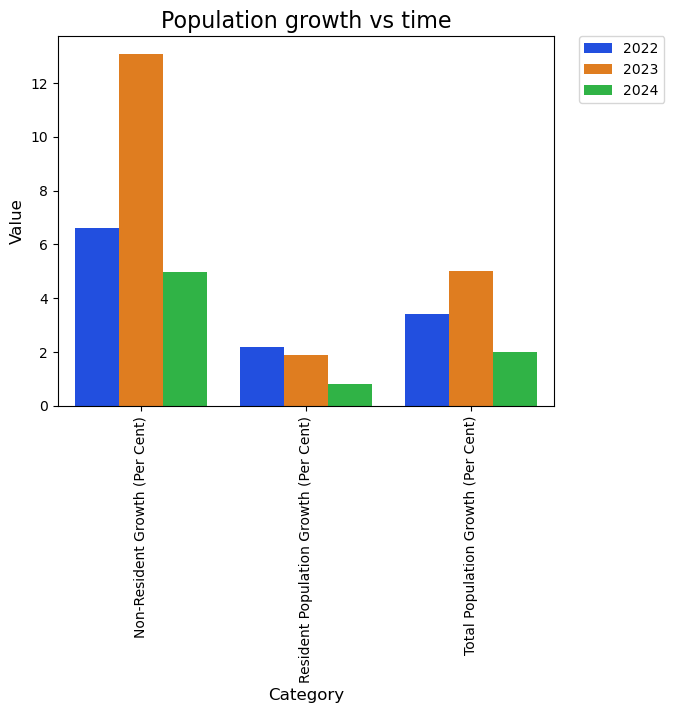

In [23]:
order = ['Non-Resident Growth (Per Cent)', 'Resident Population Growth (Per Cent)', 'Total Population Growth (Per Cent)']
df = collapsed_population_df.loc[(collapsed_population_df['category'].isin(order)) & (collapsed_population_df['year'] >= 2022)].reset_index(drop = True)
plotting('Population growth vs time', 'barplot', df, 'category', 'number_of_people', 'year', desired_order = order)